# 数据可视化作业题目

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## 练习1：航班乘客变化分析 (2个题)

1. 分析年度乘客总量的变化情况（提示：折线图）
2. 分析乘客量在一年中12个月份的分布（提示：柱状图）

In [37]:
data = sns.load_dataset("flights")
data.head()
# 年份，月份，乘客数

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [38]:
sum_year = data.groupby('year')['passengers'].sum().reset_index() #按年份对passengers求和
sum_year.head()

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700


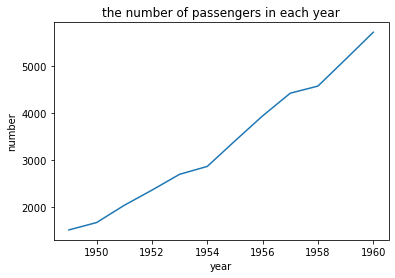

In [39]:
#画出折线图
plt.plot(sum_year['year'],sum_year['passengers'])
plt.xlabel('year')
plt.ylabel('number')
plt.title('the number of passengers in each year')
plt.show()

In [40]:
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
data['month'] = data['month'].map(month_mapping)#创建一个字典，通过map()函数将月份的英文缩写转换为数字
data.head()
sum_month= data.groupby('month')['passengers'].sum().reset_index() #按月份对passengers求和
sum_month.head()

,month,passengers
0,1,2901
1,2,2820
2,3,3242
3,4,3205
4,5,3262


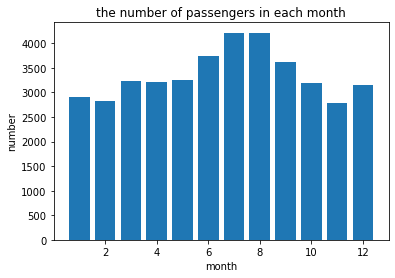

In [41]:
plt.bar(sum_month['month'],sum_month['passengers'])
plt.xlabel('month')
plt.ylabel('number')
plt.title('the number of passengers in each month')
plt.show()

## 练习2：鸢尾花花型尺寸分析 (3个题)

1. 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）
2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）
3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

In [146]:
data = sns.load_dataset("iris")
data.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


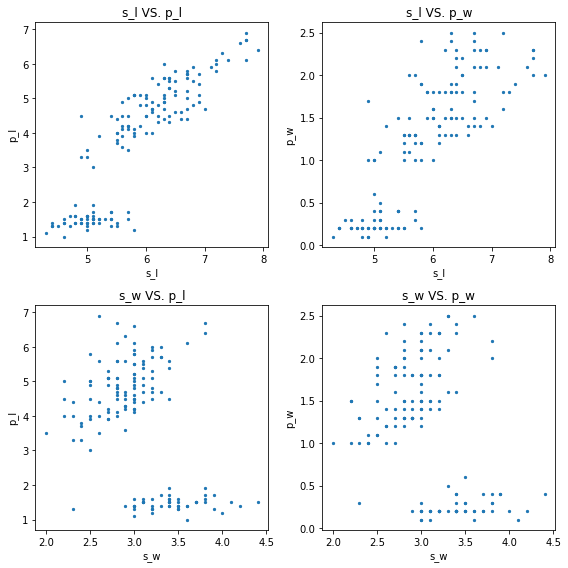

In [80]:

fig, axs = plt.subplots(2, 2,figsize=(8,8))# 创建包含四个子图的图形

axs[0,0].scatter(data['sepal_length'],data['petal_length'],s= 5)
axs[0,0].set_xlabel('s_l')
axs[0,0].set_ylabel('p_l')
axs[0,0].set_title('s_l VS. p_l')

axs[0,1].scatter(data['sepal_length'],data['petal_width'],s= 5)
axs[0,1].set_xlabel('s_l')
axs[0,1].set_ylabel('p_w')
axs[0,1].set_title('s_l VS. p_w')

axs[1,0].scatter(data['sepal_width'],data['petal_length'],s= 5)
axs[1,0].set_xlabel('s_w')
axs[1,0].set_ylabel('p_l')
axs[1,0].set_title('s_w VS. p_l')

axs[1,1].scatter(data['sepal_width'],data['petal_width'],s= 5)
axs[1,1].set_xlabel('s_w')
axs[1,1].set_ylabel('p_w')
axs[1,1].set_title('s_w VS. p_w')

plt.tight_layout()

plt.show()

In [102]:
#按种类分为四个Data
data_species = data.groupby('species')

data_setosa = data_species.get_group('setosa')

data_verscicolor = data_species.get_group('versicolor')

data_virginica = data_species.get_group('virginica')

data_setosa.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Text(0.5, 0, 'Features of the setosa flowers')

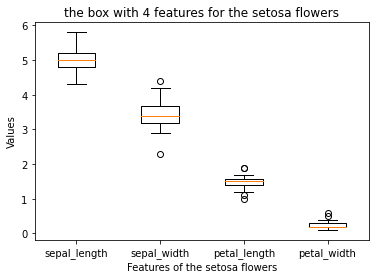

In [132]:
plt.boxplot(data_setosa.iloc[:,0:4],labels=['sepal_length','sepal_width','petal_length','petal_width'])
plt.title('the box with 4 features for the setosa flowers')
plt.ylabel('Values')
plt.xlabel('Features of the setosa flowers')

Text(0.5, 0, 'Features of the verscicolor flowers')

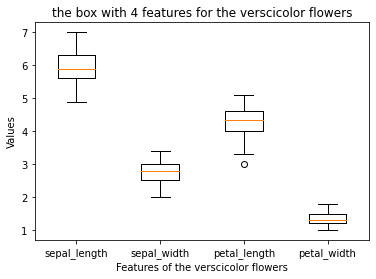

In [131]:
plt.boxplot(data_verscicolor.iloc[:,0:4],labels=['sepal_length','sepal_width','petal_length','petal_width'])
plt.title('the box with 4 features for the verscicolor flowers')
plt.ylabel('Values')
plt.xlabel('Features of the verscicolor flowers')

Text(0.5, 0, 'Features of the virginica flowers')

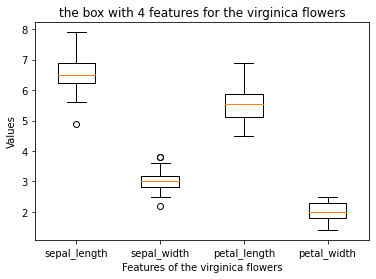

In [133]:
plt.boxplot(data_virginica.iloc[:,0:4],labels=['sepal_length','sepal_width','petal_length','petal_width'])
plt.title('the box with 4 features for the virginica flowers')
plt.ylabel('Values')
plt.xlabel('Features of the virginica flowers')

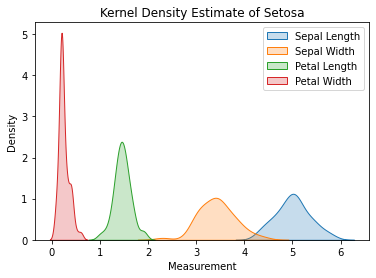

In [157]:
#Setosa的核密度估计
sns.kdeplot(data=data_setosa['sepal_length'], label='Sepal Length', shade=True)
sns.kdeplot(data=data_setosa['sepal_width'], label='Sepal Width', shade=True)
sns.kdeplot(data=data_setosa['petal_length'], label='Petal Length', shade=True)
sns.kdeplot(data=data_setosa['petal_width'], label='Petal Width', shade=True)

plt.xlabel('Measurement')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Setosa')
plt.legend()
plt.show()

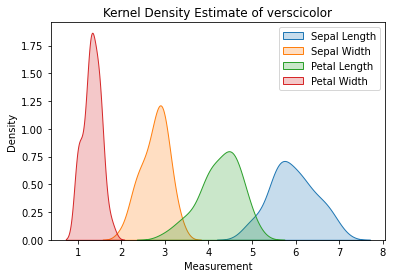

In [158]:
#verscicolor的核密度估计
sns.kdeplot(data=data_verscicolor['sepal_length'], label='Sepal Length', shade=True)
sns.kdeplot(data=data_verscicolor['sepal_width'], label='Sepal Width', shade=True)
sns.kdeplot(data=data_verscicolor['petal_length'], label='Petal Length', shade=True)
sns.kdeplot(data=data_verscicolor['petal_width'], label='Petal Width', shade=True)

plt.xlabel('Measurement')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Verscicolor')
plt.legend()
plt.show()

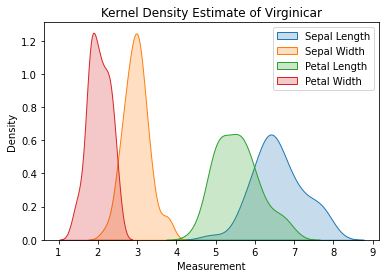

In [159]:
#virginica的核密度估计
sns.kdeplot(data=data_virginica['sepal_length'], label='Sepal Length', shade=True)
sns.kdeplot(data=data_virginica['sepal_width'], label='Sepal Width', shade=True)
sns.kdeplot(data=data_virginica['petal_length'], label='Petal Length', shade=True)
sns.kdeplot(data=data_virginica['petal_width'], label='Petal Width', shade=True)

plt.xlabel('Measurement')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Virginicar')
plt.legend()
plt.show()

## 练习3：餐厅小费情况分析 (7个题)

1. 小费和总消费之间的关系（提示：散点图+回归分析）
2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）
3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）
4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）
5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）
6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）
7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

In [109]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


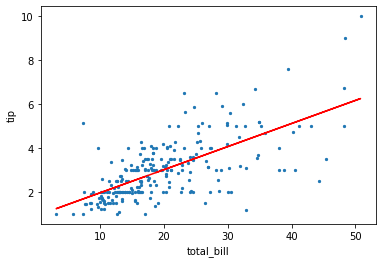

In [13]:
import numpy as np
#画散点图
plt.scatter(data['total_bill'],data['tip'],s = 5)
plt.xlabel('total_bill')
plt.ylabel('tip')
#使用numpy计算线性回归
x = data['total_bill']
co = np.polyfit(x, data['tip'], 1)
s, i = co
y = s*x + i
plt.plot(x,y,color = 'red')
plt.show()

In [15]:
#分为男女两个数据集
data_sex= data.groupby('sex')

data_f = data_sex.get_group('Female')

data_m = data_sex.get_group('Male')

data_f.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
11,35.26,5.00,Female,No,Sun,Dinner,4
14,14.83,3.02,Female,No,Sun,Dinner,2
16,10.33,1.67,Female,No,Sun,Dinner,3


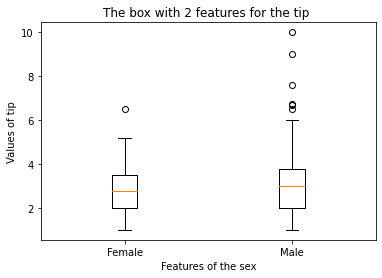

In [30]:
#创建一个1*2的数组保存男女tip数据
tip_sex = [0,0]
tip_sex[0] = data_f['tip']
tip_sex[1] = data_m['tip']
#画箱图
plt.boxplot(tip_sex,labels=['Female','Male'])
plt.title('The box with 2 features for the tip ')
plt.xlabel('Features of the sex')
plt.ylabel('Values of tip')
plt.show()

In [34]:
#分为是否吸烟两个数据集
data_s= data.groupby('smoker')

data_N = data_s.get_group('No')

data_Y = data_s.get_group('Yes')

data_N.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


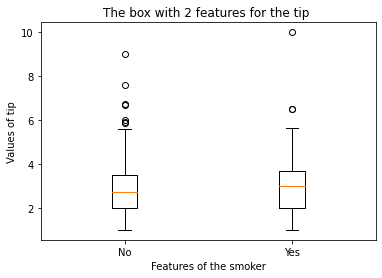

In [35]:
#创建一个1*2的数组保存数据
s_tip = [0,0]
s_tip[0] = data_N['tip']
s_tip[1] = data_Y['tip']
#画箱图
plt.boxplot(s_tip,labels=['No','Yes'])
plt.title('The box with 2 features for the tip ')
plt.xlabel('Features of the smoker')
plt.ylabel('Values of tip')
plt.show()

In [36]:
#按星期分为4个数据集
data_day= data.groupby('day')

data_Sun = data_day.get_group('Sun')
data_Sat = data_day.get_group('Sat')
data_Thur = data_day.get_group('Thur')
data_Fri = data_day.get_group('Fri')

data_Sun.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


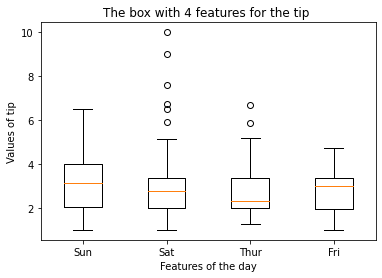

In [37]:
#创建一个1*4的数组保存数据
D_tip = [0,0,0,0]
D_tip[0] = data_Sun['tip']
D_tip[1] = data_Sat['tip']
D_tip[2] = data_Thur['tip']
D_tip[3] = data_Fri['tip']

#画箱图
plt.boxplot(D_tip,labels=['Sun','Sat','Thur','Fri'])
plt.title('The box with 4 features for the tip ')
plt.xlabel('Features of the day')
plt.ylabel('Values of tip')
plt.show()

In [39]:
#按用餐时间分为两个数据集
data_time= data.groupby('time')

data_D = data_time.get_group('Dinner')

data_L = data_time.get_group('Lunch')

data_D.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


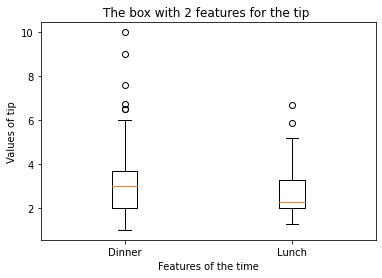

In [40]:
#创建一个1*2的数组保存数据
t_tip = [0,0]
t_tip[0] = data_D['tip']
t_tip[1] = data_L['tip']
#画箱图
plt.boxplot(t_tip,labels=['Dinner','Lunch'])
plt.title('The box with 2 features for the tip ')
plt.xlabel('Features of the time')
plt.ylabel('Values of tip')
plt.show()

In [52]:
#效率低，需要改进
data_size= data.groupby('size')
data_1 = data_size.get_group(1)
data_2 = data_size.get_group(2)
data_3 = data_size.get_group(3)
data_4 = data_size.get_group(4)
data_5 = data_size.get_group(5)
data_6 = data_size.get_group(6)
data_1.head()


,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
82,10.07,1.83,Female,No,Thur,Lunch,1
111,7.25,1.00,Female,No,Sat,Dinner,1
222,8.58,1.92,Male,Yes,Fri,Lunch,1


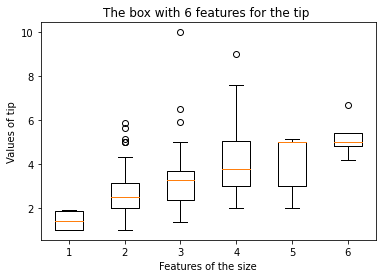

In [58]:
s_tip = [0,0,0,0,0,0]
s_tip[0] = data_1['tip']
s_tip[1] = data_2['tip']
s_tip[2] = data_3['tip']
s_tip[3] = data_4['tip']
s_tip[4] = data_5['tip']
s_tip[5] = data_6['tip']

#画箱图
plt.boxplot(s_tip,labels=['1','2','3','4','5','6'])
plt.title('The box with 6 features for the tip ')
plt.xlabel('Features of the size')
plt.ylabel('Values of tip')
plt.show()


In [72]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


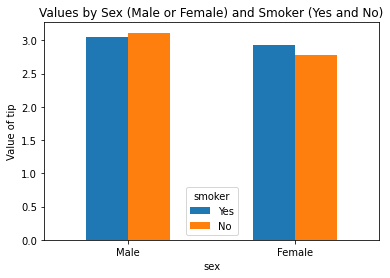

In [116]:
import pandas as pd
df = data.groupby(['sex','smoker'])['tip'].mean()
df = df.unstack()

# 绘制柱状图
df.plot(kind='bar', rot=0, title='Values by Sex (Male or Female) and Smoker (Yes and No)', ylabel='Value of tip')

plt.show()

## 练习4：泰坦尼克号海难幸存状况分析 (8个题)

1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）
2. 不同性别的幸存比例（提示：箱图或者提琴图）
3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）
4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）
5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）
6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）
7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）
8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

In [117]:
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [134]:
#效率更高
classes = []
survived_s = [[], []]
for pclass, items in data.groupby(by=['pclass']):
    classes.append(pclass)
    count0 = items[items['alive'] == 'no']['alive'].count()
    count1 = items[items['alive'] == 'yes']['alive'].count()
    survived_s[0].append(count0)
    survived_s[1].append(count1)

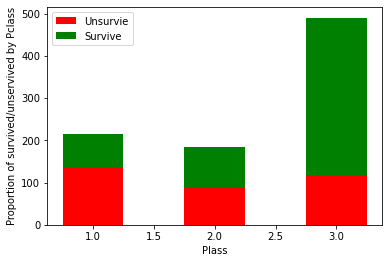

In [136]:

# 绘制图形
plt.bar(classes, survived_s[1], color='r', width=0.5)
plt.bar(classes, survived_s[0], bottom=survived_s[1], color='g', width=0.5)

plt.legend(['Unsurvie', 'Survive'])
plt.xlabel("Plass")
plt.ylabel("Proportion of survived/unservived by Pclass")

plt.show()

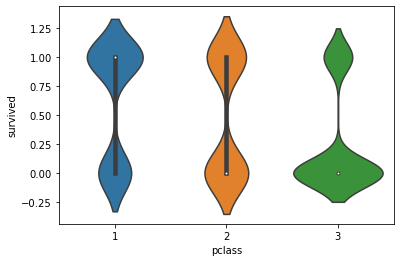

In [154]:
sns.violinplot(x="pclass", y="survived", data=data)
plt.show()

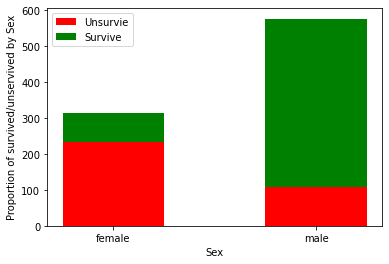

In [139]:
classes = []
survived_s = [[], []]
for sex, items in data.groupby(by=['sex']):
    classes.append(sex)
    count0 = items[items['alive'] == 'no']['alive'].count()
    count1 = items[items['alive'] == 'yes']['alive'].count()
    survived_s[0].append(count0)
    survived_s[1].append(count1)

plt.bar(classes, survived_s[1], color='r', width=0.5)
plt.bar(classes, survived_s[0], bottom=survived_s[1], color='g', width=0.5)

plt.legend(['Unsurvie', 'Survive'])
plt.xlabel("Sex")
plt.ylabel("Proportion of survived/unservived by Sex")

plt.show()

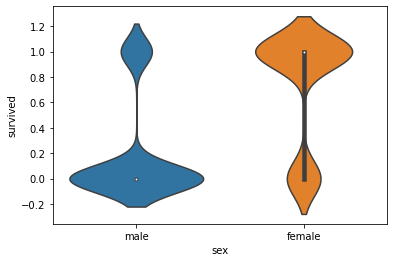

In [155]:
sns.violinplot(x="sex", y="survived", data=data)
plt.show()

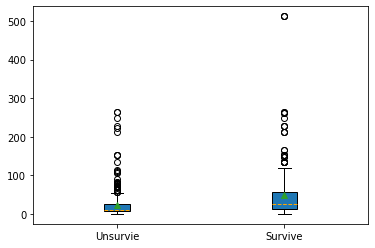

In [143]:
survived_s = []
fares = []
for survived, item in data.groupby(by=['survived']):
    survived_s.append(survived)
    fares.append(item['fare'])

str_sur = ['Unsurvie', 'Survive']
plt.boxplot(x=fares, patch_artist=True, labels=str_sur, showmeans=True,
            medianprops={'linestyle': '--', 'color': 'orange'})
plt.show()


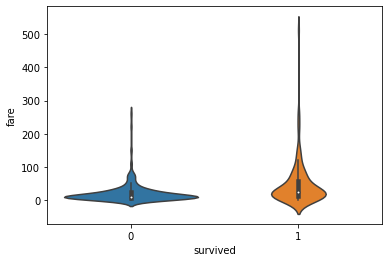

In [156]:
sns.violinplot(x="survived", y="fare", data=data)
plt.show()

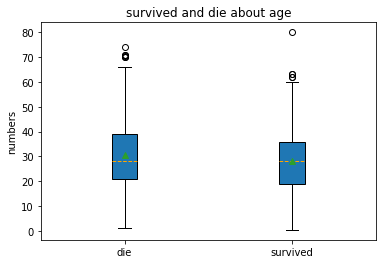

In [144]:
survived_s = []
fares = []

temp = data.dropna(subset=['age'], how='any')
for survived, items in temp.groupby(by=['survived']):
    survived_s.append(survived)
    fares.append(items['age'])
str_sur = ['die', 'survived']
plt.ylabel("numbers")
plt.title("survived and die about age")
plt.boxplot(x=fares, patch_artist=True, labels=str_sur, showmeans=True,
            medianprops={'linestyle': '--', 'color': 'orange'})
plt.show()


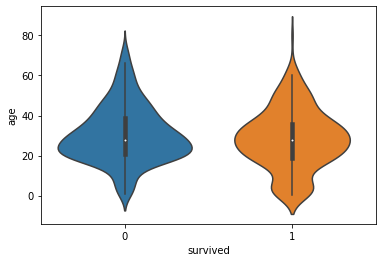

In [157]:
sns.violinplot(x="survived", y="age", data=data)
plt.show()

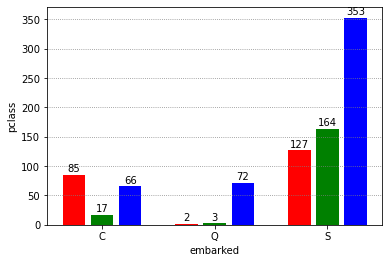

In [161]:
embarkeds = []
pclasses = []
# print(data['embarked'].drop_duplicates())
for embarked, items in data.groupby(by=['embarked']):
    embarkeds.append(embarked)
    p_class_s = []
    for p_class, values in items.groupby(by=['pclass']):
        p_class_s.append(values['pclass'].count())
    pclasses.append(p_class_s)

x = np.array(range(len(embarkeds)))
plt.bar(x - 0.25, [i[0] for i in pclasses], width=0.2, color='r')
plt.bar(x, [i[1] for i in pclasses], width=0.2, color='g')
plt.bar(x + 0.25, [i[2] for i in pclasses], width=0.2, color='b')

for i, val in enumerate(x):
    item = pclasses[i]
    plt.text(val - 0.25, item[0] + 5, '%s' % item[0], ha='center')
    plt.text(val, item[1] + 5, '%s' % item[1], ha='center')
    plt.text(val + 0.25, item[2] + 5, '%s' % item[2], ha='center')
plt.xticks(x, embarkeds)
plt.grid(axis='y', color='gray', linestyle=':')
plt.xlabel("embarked")
plt.ylabel("pclass")
plt.show()


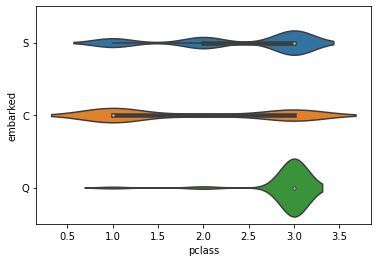

In [159]:
sns.violinplot(x="pclass", y="embarked", data=data)
plt.show()

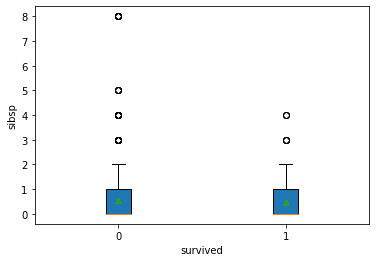

In [146]:
sibsps = []
survived = []
for survive, items in data.groupby(by=['survived']):
    survived.append(survive)
    sibsps.append(items['sibsp'])
plt.boxplot(x=sibsps, patch_artist=True, labels=survived, showmeans=True,
            meanprops={'linestyle': '--', 'color': 'orange'})
plt.xlabel('survived')
plt.ylabel('sibsp')
plt.show()


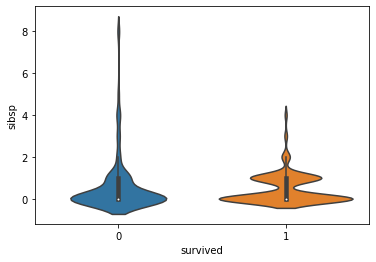

In [162]:
sns.violinplot(x="survived", y="sibsp", data=data)
plt.show()

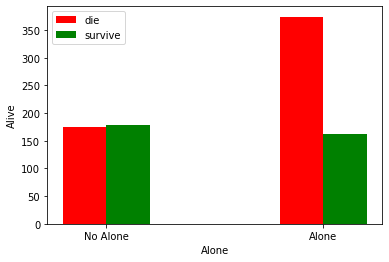

In [147]:
survived = np.array([0, 1])
temp = data.groupby(by=['alone', 'survived']).count()


t1 = temp.loc[False, :].loc[0, :].max()
t2 = temp.loc[False, :].loc[1, :].max()
t3 = temp.loc[True, :].loc[0, :].max()
t4 = temp.loc[True, :].loc[1, :].max()

width = 0.1
plt.bar(survived - width, [t1, t3], color='r', width=width * 2)
plt.bar(survived + width, [t2, t4], color='g', width=width * 2)

plt.xlabel('Alone')
plt.ylabel('Alive')
plt.xticks(survived, ['No Alone', 'Alone'])
plt.legend(['die', 'survive'])
plt.show()
